In [ ]:
"""
Description: this script was designed to take line plot data from a .xlsx file as input, create normalized line plots, and compare the rate of increase in signal over distance at the edge of a biological structure captured with STED imaging. 

Input: One .xlsx file with data organized as follows:

    Sheet 1: values for channel 1 in image 1
        Column 1    |   Column 2    |   Column 3    |   Column 4    |   etc...
        distance 1      intensity 1     distance 2      intensity 2     etc...
        
    Sheet 2: values for channel 2 in image 1
        Column 1    |   Column 2    |   Column 3    |   Column 4    |   etc...
        distance 1      intensity 1     distance 2      intensity 2     etc...
        
    Sheet 3: values for channel 1 in image 2
        Column 1    |   Column 2    |   Column 3    |   Column 4    |   etc...
        distance 1      intensity 1     distance 2      intensity 2     etc...
        
    Sheet 4: values for channel 2 in image 2
        Column 1    |   Column 2    |   Column 3    |   Column 4    |   etc...
        distance 1      intensity 1     distance 2      intensity 2     etc...

Output: Normalized line plots for each pair of lines between channels. 

Written by: Lukas Fuentes (Bewersdorf Lab)

Last updated: 5-25-2023
"""

In [106]:
# Parameters to change
savedir = "C:\\Users\\laf62\\Desktop\\LAF-Drive\\Yale_University\\Bewersdorf_Lab\\Yifei-Lukas-Collab\\Analysis_output\\"  #File path to folder where you want to save the output of this script
save_folder = "PLD3_analysis"
ver = "_V1"

# PLD3 data
data1 = "C:\\Users\\laf62\\Desktop\\LAF-Drive\\Yale_University\\Bewersdorf_Lab\\Yifei-Lukas-Collab\\PLD3_data\\summary STED data PLD3 proximity labeling 5min, PLD3-647N, streptatvidin-594.lif.xlsx"
name = "PLD3"

# MAG data
#data1 = "C:\\Users\\laf62\\Desktop\\LAF-Drive\\Yale_University\\Bewersdorf_Lab\\Yifei-Lukas-Collab\\MAG_data\\summary MAG proximity labeling sted quant.xlsx"
#name = "MAG"

# Don't touch
savepath = savedir + save_folder
from pathlib import Path
Path(savepath).mkdir(parents=True, exist_ok=True)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import csv

#Color blind friendly colors to use in plots
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

# The following syntax was found at https://stackoverflow.com/questions/26521266/using-pandas-to-pd-read-excel-for-multiple-worksheets-of-the-same-workbook
# Read .xlsx file
adata = pd.read_excel(data1, sheet_name=None)
# Extract names of sheets
xls = pd.ExcelFile(data1)
sheets = xls.sheet_names

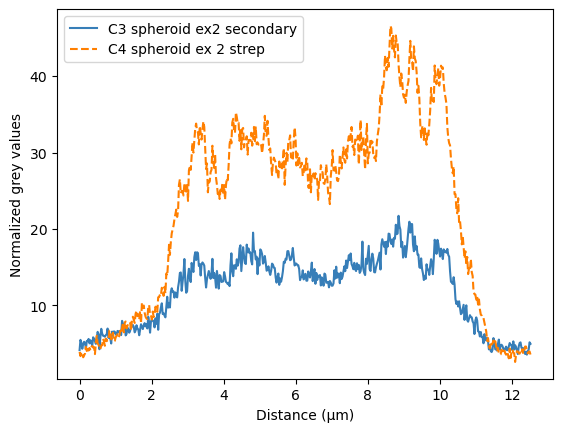

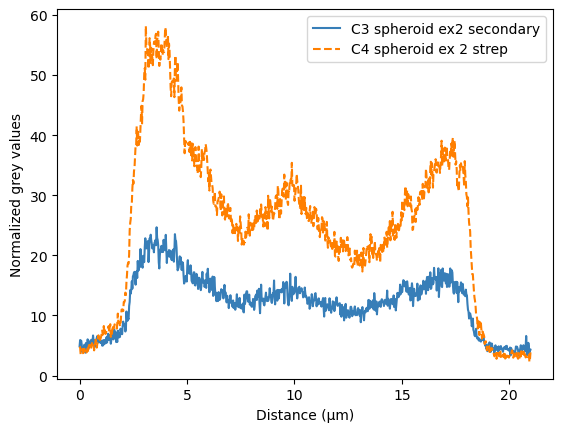

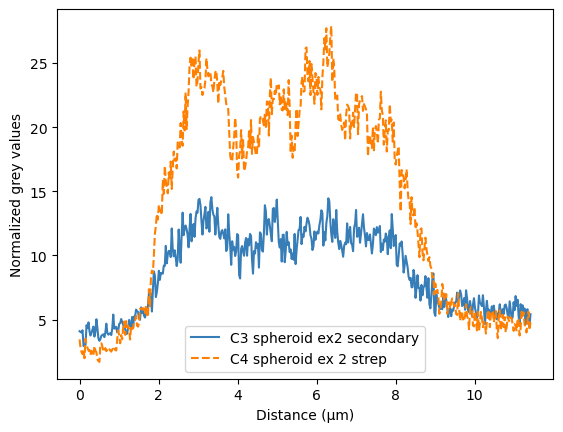

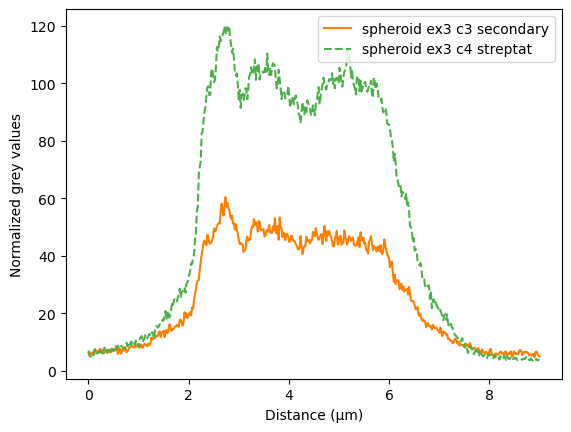

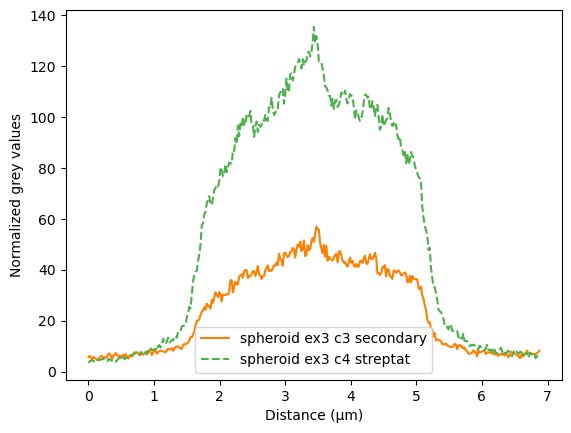

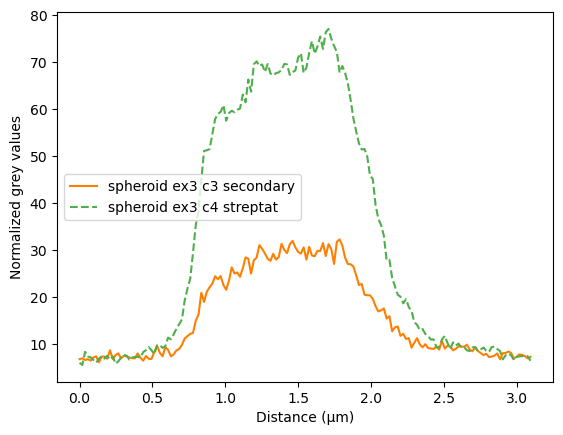

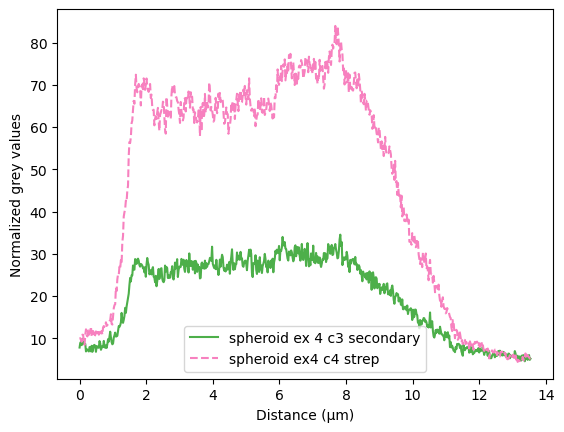

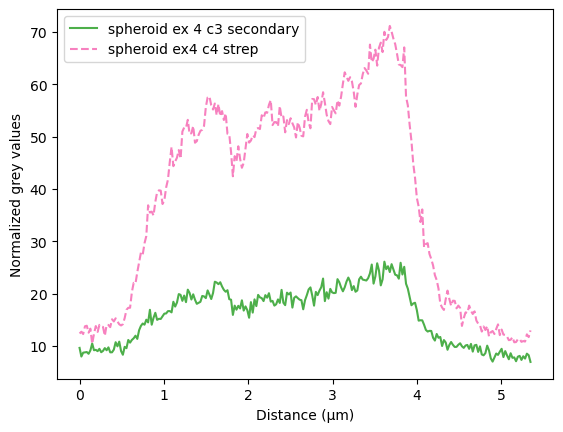

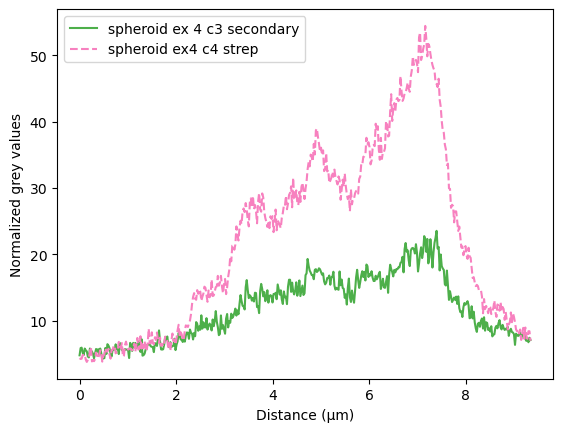

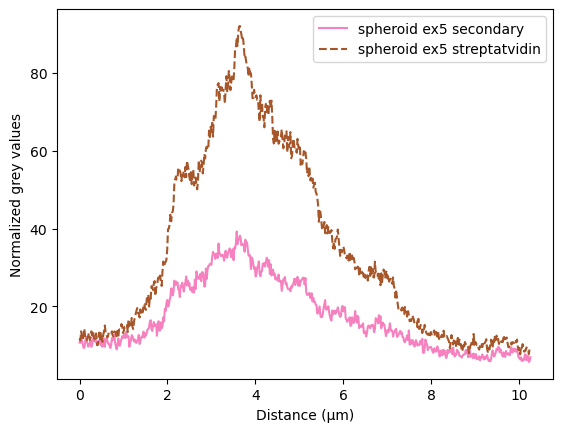

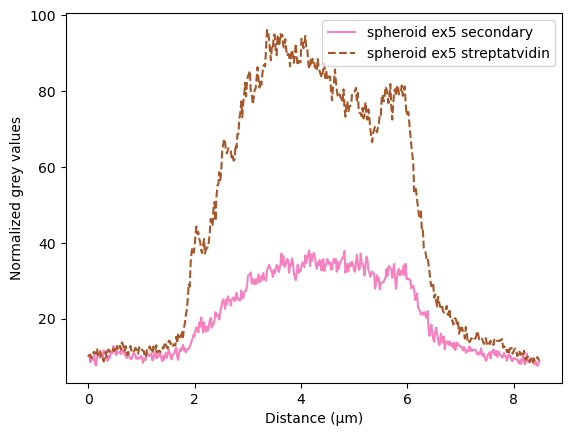

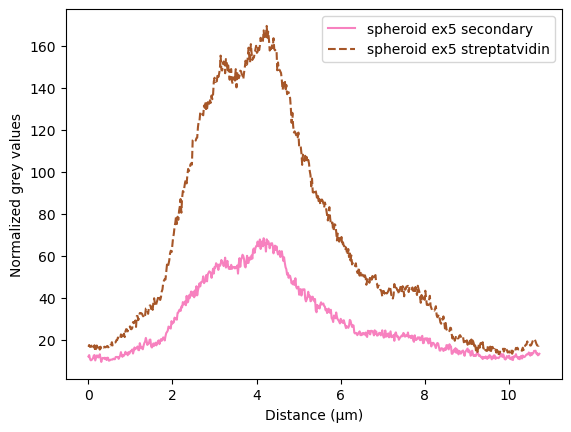

In [155]:
#Extract distance colum and grey values column, remove NaNs from both, and plot the pairs
for a in range(int(len(sheets)/2)):
    npdata1 = np.array(adata[sheets[2*a]])
    npdata2 = np.array(adata[sheets[1+(2*a)]])
    for b in range(int(np.size(npdata1,1)/2)):
        fig = plt.figure()
        dist1 = npdata1[:,0+(2*b)]
        dist2 = npdata2[:,0+(2*b)]
        gv1 = npdata1[:,1+(2*b)]
        gv2 = npdata2[:,1+(2*b)]
        dist1 = dist1[~np.isnan(dist1)]
        dist2 = dist2[~np.isnan(dist2)]
        gv1 = gv1[~np.isnan(gv1)]
        gv2 = gv2[~np.isnan(gv2)]
        #Normalize the grey values
        gv_max1 = np.max(gv1)
        gv_max2 = np.max(gv2)
        gv_norm1 = gv1/gv_max1
        gv_norm2 = gv2/gv_max2
        plt.plot(dist1, gv1, label=sheets[2*a], color=CB_color_cycle[a])
        plt.plot(dist2, gv2, label=sheets[1+2*a], linestyle='--', color=CB_color_cycle[a+1])
        plt.legend()
        plt.xlabel('Distance (\u03BCm)')
        plt.ylabel('Normalized grey values')
        # plot_save = savepath + '\\' + sheets[2*a] +'_vs_' + sheets[1+2*a] + '_plot' + str(b) + '_' + name + ver + '.png'
        # plt.savefig(plot_save, dpi=300, facecolor='w', edgecolor='w',
        # orientation='portrait', papertype=None, format=None,
        # transparent=False, bbox_inches="tight", pad_inches=0.05,
        # metadata=None)
        plt.show()
        plt.close()

In [82]:
# Function to find the indices of the grey values that are closest to a list of input values. It returns two indices, one on each side of the peak, for each input value
def closest_values(input_list, input_values):
    res = []
    mx = np.argmax(input_list)
    il1 = input_list[:mx]
    il2 = input_list[mx:]
    arr1 = np.asarray(il1)
    arr2 = np.asarray(il2)
    for a in range(len(input_values)):
        i1 = (np.abs(arr1 - input_values[a])).argmin()
        i2 = (np.abs(arr2 - input_values[a])).argmin()
        res.append([i1,mx+i2])
    return res#arr[i]

# Quantify the radii of the secondary and steptavidin labeling
intens_list = [0.4,0.5,0.6] # list of intensity measurements where radii will be measured
dist_diff1 = []
dist_diff2 = []
for a in range(int(len(sheets)/2)):
    npdata1 = np.array(adata[sheets[2*a]])
    npdata2 = np.array(adata[sheets[1+(2*a)]])
    for b in range(int(np.size(npdata1,1)/2)):
        dist1 = npdata1[:,0+(2*b)]
        dist2 = npdata2[:,0+(2*b)]
        gv1 = npdata1[:,1+(2*b)]
        gv2 = npdata2[:,1+(2*b)]
        dist1 = dist1[~np.isnan(dist1)]
        dist2 = dist2[~np.isnan(dist2)]
        gv1 = gv1[~np.isnan(gv1)]
        gv2 = gv2[~np.isnan(gv2)]
        #Normalize the grey values
        gv_max1 = np.max(gv1)
        gv_max2 = np.max(gv2)
        gv_norm1 = gv1/gv_max1
        gv_norm2 = gv2/gv_max2
        # Find indices of grey values closest to input values on either side of the peak intensity
        inds1 = closest_values(gv_norm1,intens_list)
        inds2 = closest_values(gv_norm2,intens_list)
        # Calculate ratios
        for c in range(len(intens_list)):
            dist_diff1.append(dist1[inds1[c][1]]-dist1[inds1[c][0]])
            dist_diff2.append(dist2[inds2[c][1]]-dist2[inds2[c][0]])
dist_diff1 = np.asarray(dist_diff1)
dist_diff2 = np.asarray(dist_diff2)

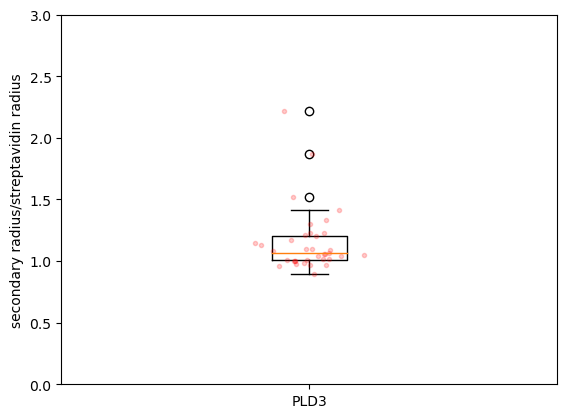

W = 78.0, p-value = 0.000062


In [150]:
rat = dist_diff1/dist_diff2
fig = plt.figure()
plt.boxplot(rat)
x = np.random.normal(1, 0.04, size=len(rat))
plt.plot(x, rat, 'r.', alpha=0.2)
plt.ylim([0,3])
plt.ylabel('secondary radius/streptavidin radius')
plt.xticks([1], [name])
plt.show()
plt.close()
# Statistics
from scipy.stats import wilcoxon as wil

rat = np.array(rat)
null = 1

W, p = wil(rat - null)

print("W = %.1f, p-value = %f" % (W, p))

In [149]:
ones = np.ones(20)
# ones2 = np.full(20,0.01)
total = np.array([0.99 if i < 10 else 1.01 for i in range(20)])

W, p = wil(ones-total)
print("W = %.1f, p-value = %.3f" % (W, p))

W = 105.0, p-value = 1.000


In [145]:
# total = [np.full(10,0.99),np.full(10,0.01)]
total = np.array([0.99 if i < 10 else 1.01 for i in range(20)])
total

array([0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.01,
       1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01])

In [61]:
def closest_values(input_list, input_values):
    res = []
    mx = np.argmax(input_list)
    il1 = input_list[:mx]
    il2 = input_list[mx:]
    arr1 = np.asarray(il1)
    arr2 = np.asarray(il2)
    for a in range(len(input_values)):
        i1 = (np.abs(arr1 - input_values[a])).argmin()
        i2 = (np.abs(arr2 - input_values[a])).argmin()
        res.append([i1,(2*third)+i2])
    return res#arr[i]

closest_values(gv_norm1,[0.4,0.5,0.6])

[[111, 514], [120, 480], [137, 459]]